#                                            Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
pip install -U pip --user 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#### import basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [3]:
##### Load the datasets
census_df=pd.read_csv('census_income.csv')

In [4]:
census_df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

#### dataEDA (Exploritory data Analysis)

In [5]:
#### check Statistical Information of data types
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
##### check the stastical summary of datasets
census_df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
#### shape of the datasets
census_df.shape

(32560, 15)

##### Rows - 32560
##### Columns - 15

In [8]:
census_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
census_df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
#### No Null value found in any columns

In [11]:
#### see the numbers of columns in datasets
census_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#### check the unique 
census_df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [13]:
census_df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [14]:
census_df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
census_df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
census_df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [17]:
census_df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [18]:
census_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [19]:
census_df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [20]:
census_df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [21]:
census_df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [22]:
census_df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [23]:
census_df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [24]:
census_df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [25]:
census_df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [26]:
census_df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
census_df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [28]:
##### check the all unique values spresent in each columns 

##### Preprocessing and Visualization of Data

<AxesSubplot:>

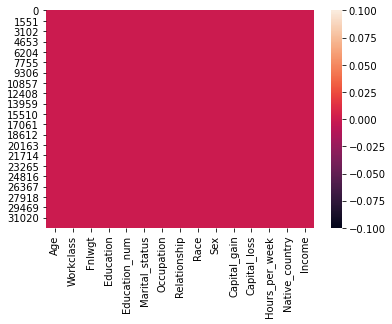

In [29]:
#### view isnull using heatmap 
sns.heatmap(census_df.isnull())

In [30]:
##### fill the question (? with missing/NaN Value)
census_df[census_df==' ?']=np.nan

In [31]:
census_df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#### found  columns have null/missiing value and have to handle this

##### fill the missing value and as i check all missing value columns are in catagorical form so use mode to fill the nan value 

In [32]:
census_df['Native_country'].fillna(census_df['Native_country'].mode()[0], inplace=True)

In [33]:
census_df['Workclass'].fillna(census_df['Workclass'].mode()[0],inplace=True)
census_df['Occupation'].fillna(census_df['Occupation'].mode()[0],inplace=True)

In [34]:
#### check the null value again
census_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [35]:
census_df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [36]:
##### all Missing values has been filled by mode techiniques

<AxesSubplot:xlabel='Workclass', ylabel='count'>

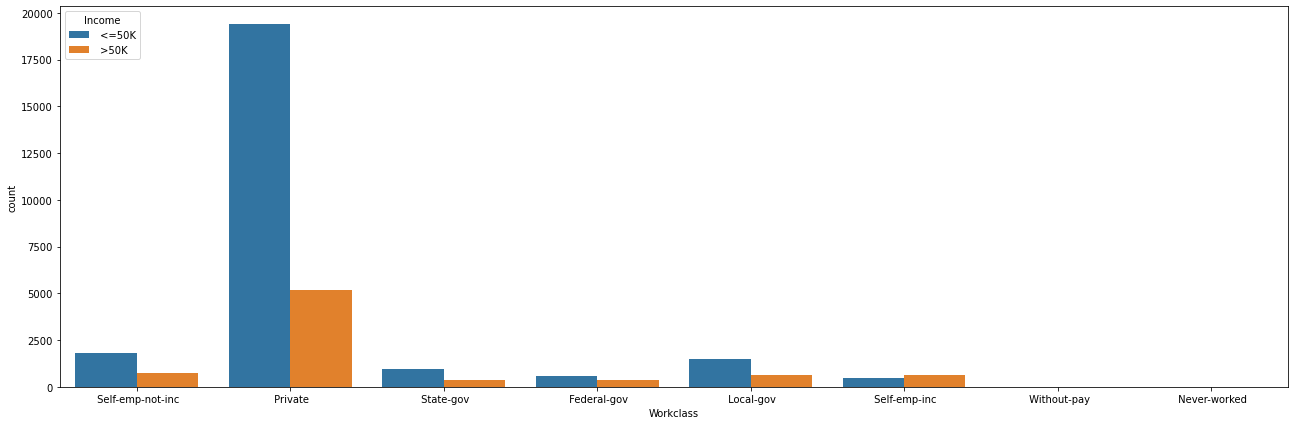

In [37]:
#### see the countplot to visualize univariate analysis
plt.figure(figsize=(22,7))
sns.countplot(x='Workclass',hue='Income',data=census_df)

#### from graph it seems to be that in all workplace income is less than and equal 50 is more in count

<AxesSubplot:xlabel='Education', ylabel='count'>

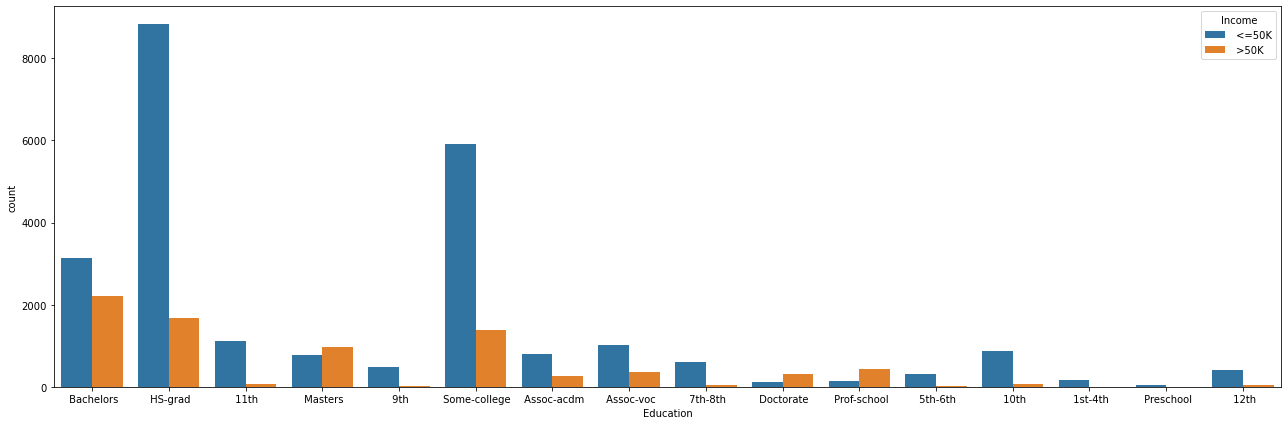

In [38]:
plt.figure(figsize=(22,7))
sns.countplot(x='Education',hue='Income',data=census_df)

##### from above chart it seems to be that Doctorate and prof-school have income more than 50 and rest in all have less

<AxesSubplot:xlabel='Age', ylabel='count'>

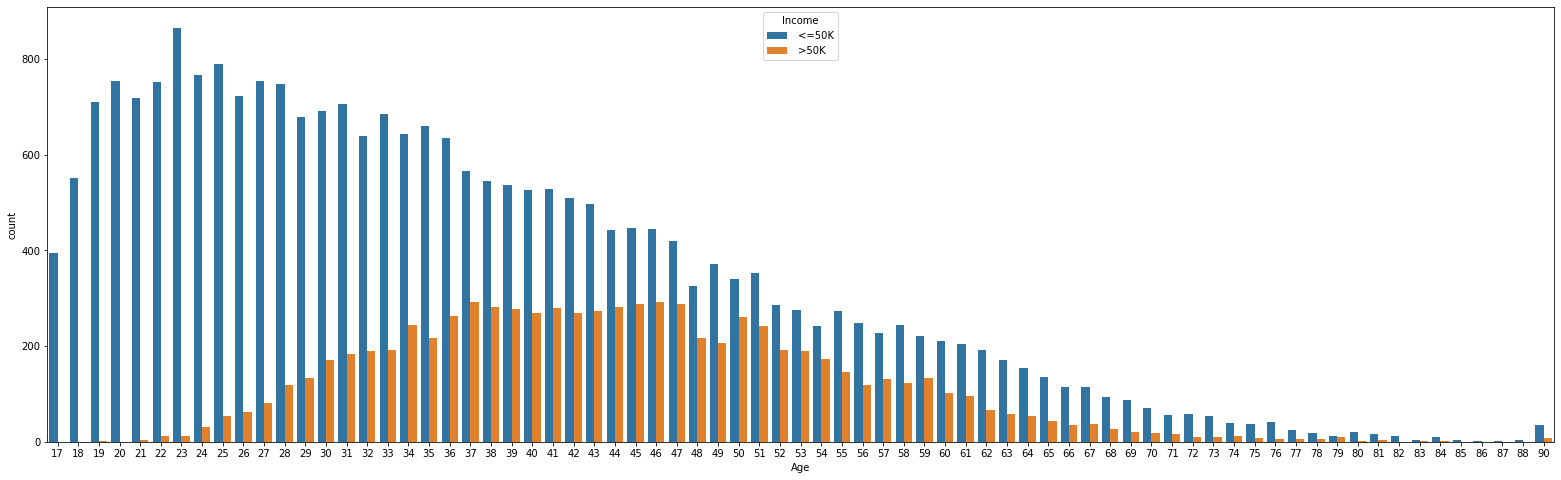

In [39]:
plt.figure(figsize=(27,8))
sns.countplot(x='Age',hue='Income',data=census_df)

###### ALmost all Age have income less than 50K

<AxesSubplot:xlabel='Sex', ylabel='count'>

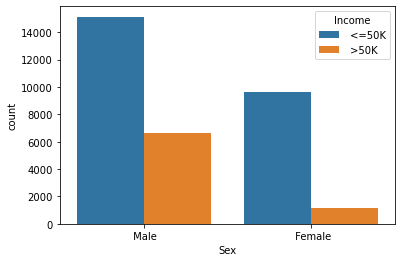

In [40]:
sns.countplot(x='Sex',hue='Income',data=census_df)

##### In both sex count of income less than 50k is to be observed

<AxesSubplot:xlabel='Occupation', ylabel='count'>

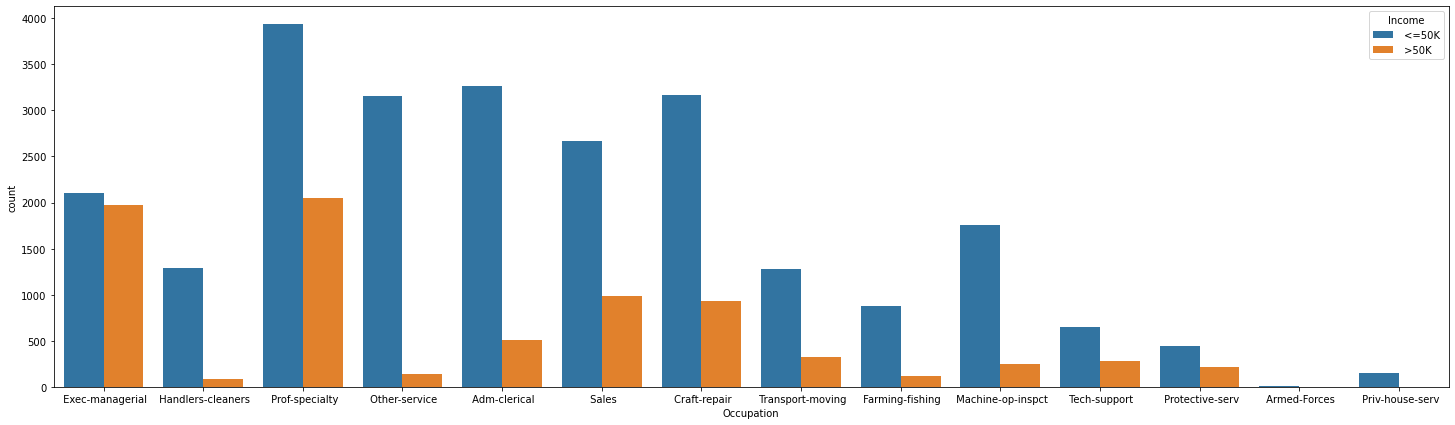

In [41]:
plt.figure(figsize=(25,7))
sns.countplot(x='Occupation',hue='Income',data=census_df)

#### Exex-managerial have almost same salary having more than 50 and less than 50 also

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

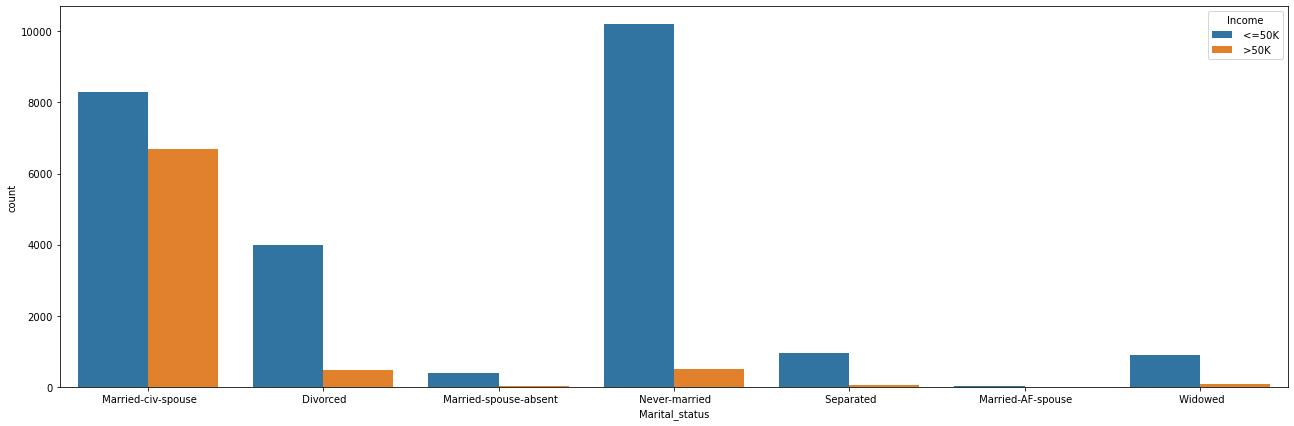

In [42]:
plt.figure(figsize=(22,7))
sns.countplot(x='Marital_status',hue='Income',data=census_df)

###### Max count below and equal salary in Never Married ,Divorced 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

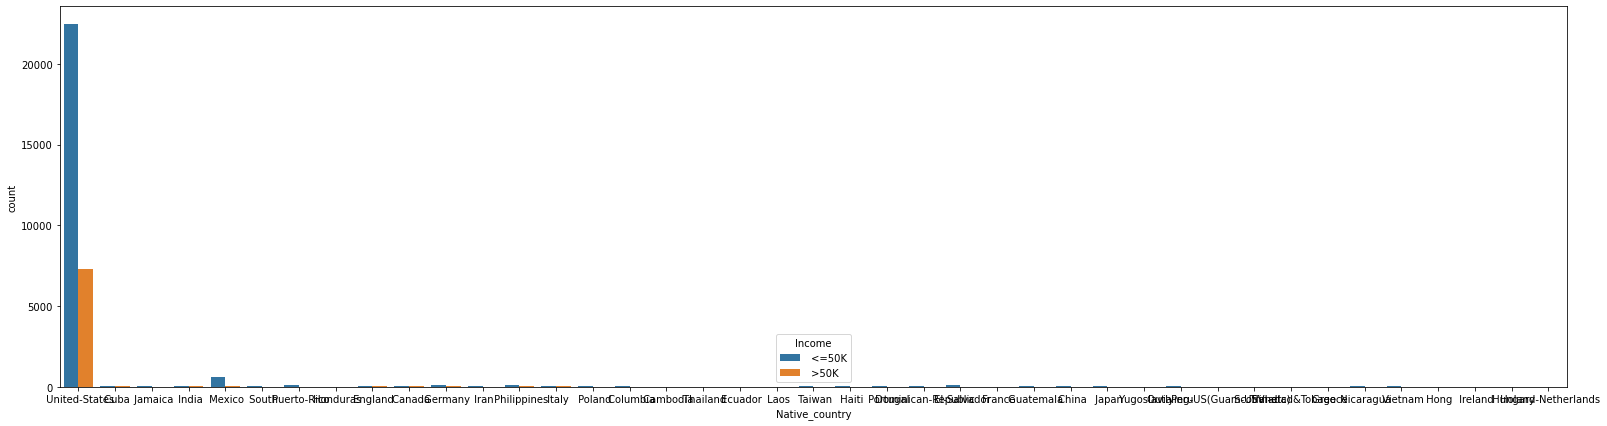

In [43]:
plt.figure(figsize=(27,7))
sns.countplot(x='Native_country',hue='Income',data=census_df)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

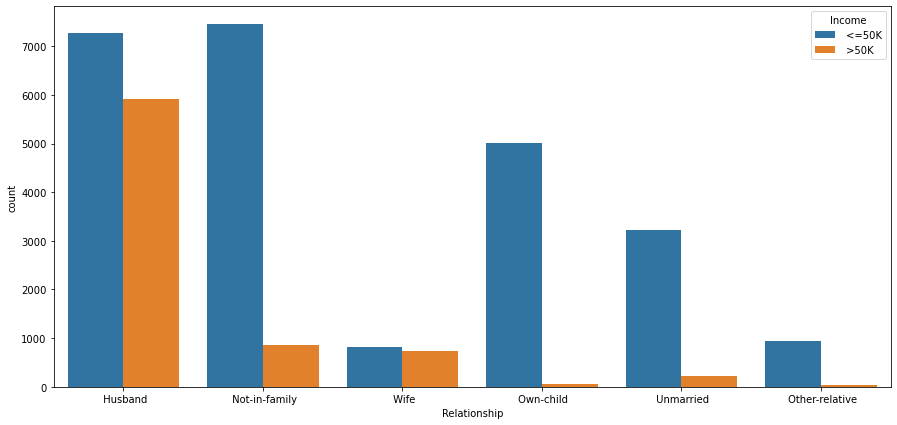

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=census_df)

##### In Husband Category having income below and equal 50K and also have max salary count above 50 k ,in wife categpory alomsiot similar income

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

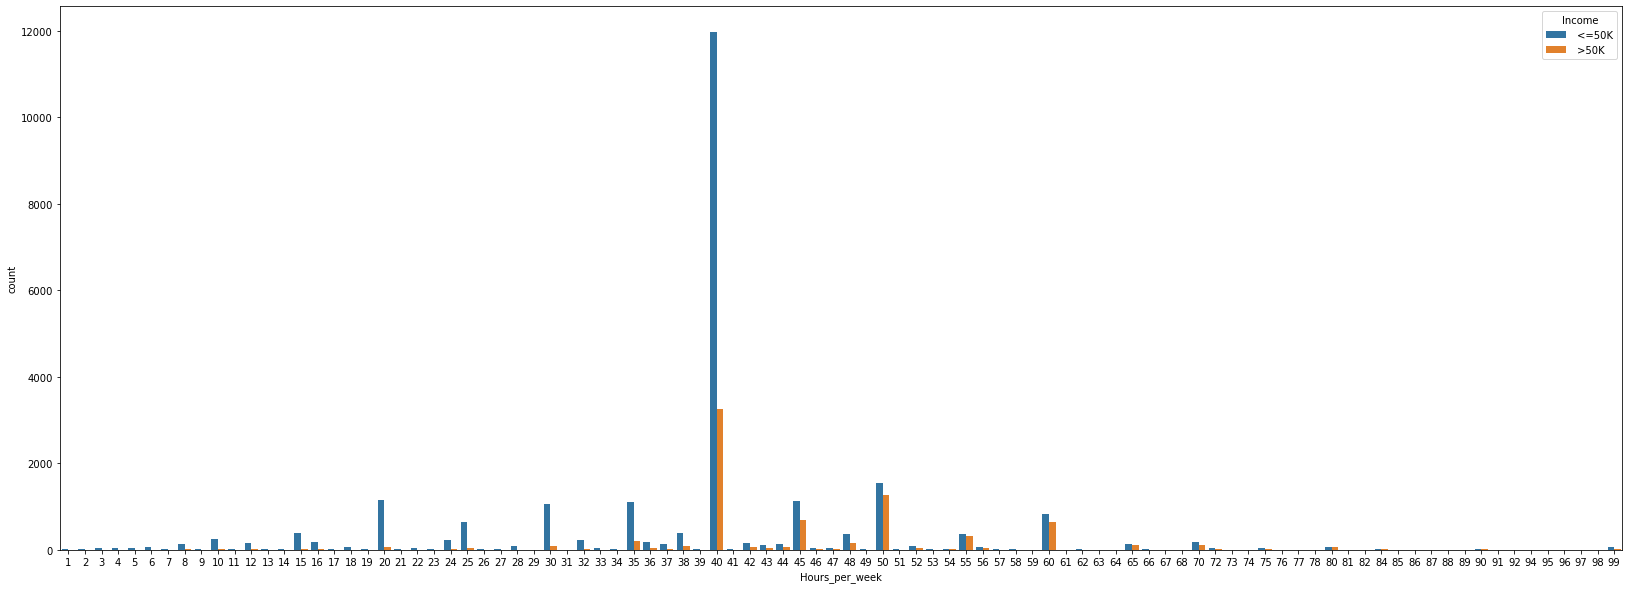

In [45]:
plt.figure(figsize=(28,10))
sns.countplot(x='Hours_per_week',hue='Income',data=census_df)

##### 40 Hr per week have max count for salary equal and below 50 k and also have few one getting salary having more then 50 K

<AxesSubplot:xlabel='Income', ylabel='count'>

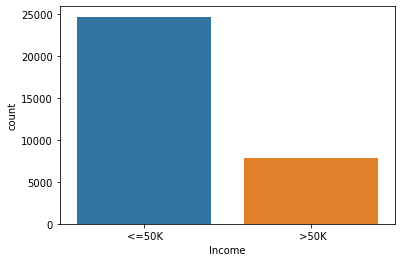

In [46]:
sns.countplot(census_df['Income'])

###### Found Class imbalnce in target variable

In [47]:
x=census_df.drop(['Income'],axis=1)
y=census_df['Income']

In [56]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

     ------------------------------------ 162.6/162.6 KB 443.0 kB/s eta 0:00:00


     ---------------------------------------- 6.4/6.4 MB 459.4 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [57]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
ros=RandomOverSampler(random_state=42)
x_over,y_over=ros.fit_resample(x,y)
print('Print Original Dataset',Counter(y))
print('Print Original Dataset',Counter(y_over))

Print Original Dataset Counter({' <=50K': 24719, ' >50K': 7841})
Print Original Dataset Counter({' <=50K': 24719, ' >50K': 24719})


##### Using Oversampling balance the class

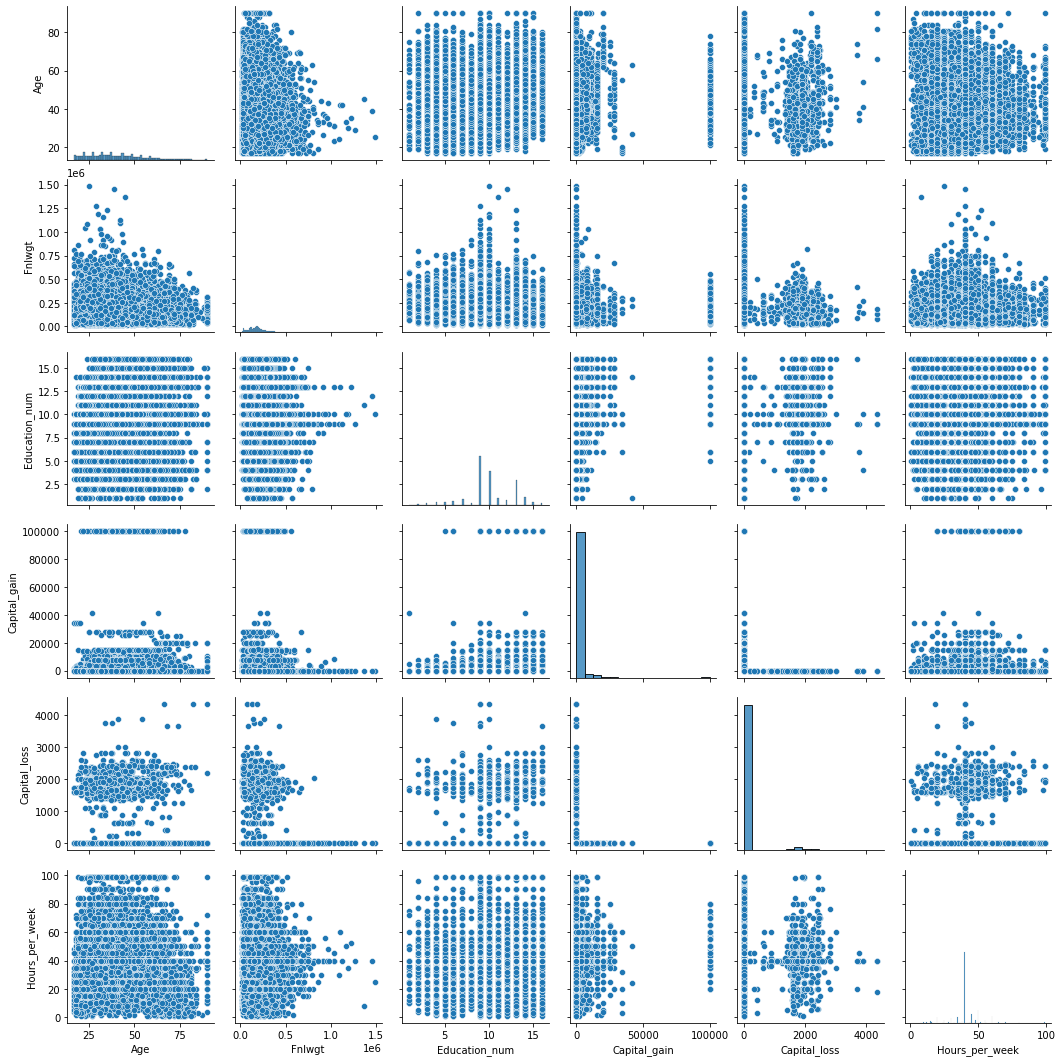

In [58]:
sns.pairplot(census_df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Age'>

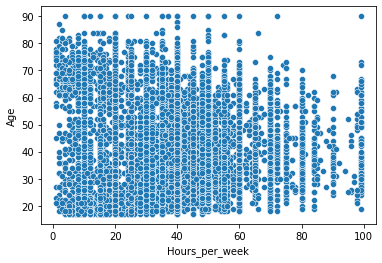

In [59]:
sns.scatterplot(x='Hours_per_week',y='Age',data=census_df)

##### points are highly postive to each other

###### Feature Selection

In [60]:
cor = census_df.corr()

In [61]:
cor

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076646       0.036527      0.077674      0.057775   
Fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
Education_num   0.036527 -0.043159       1.000000      0.122627      0.079932   
Capital_gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
Capital_loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
Hours_per_week  0.068756 -0.018770       0.148127      0.078409      0.054256   

                Hours_per_week  
Age                   0.068756  
Fnlwgt               -0.018770  
Education_num         0.148127  
Capital_gain          0.078409  
Capital_loss          0.054256  
Hours_per_week        1.000000

<AxesSubplot:>

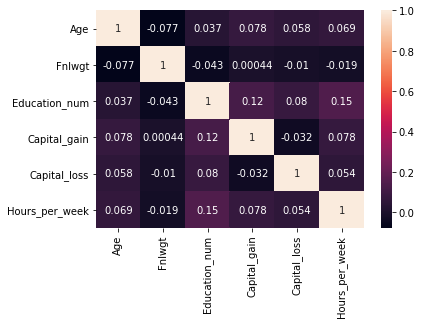

In [62]:
sns.heatmap(cor,annot=True)

#### capital Gain with Age havining good co realtion

In [63]:
#### encoding Techniques
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
census_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [65]:
census_df_cols=('Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income')

for i in census_df_cols:
    census_df[i]=le.fit_transform(census_df[i])

In [66]:
census_df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          5   83311          9             13               2   
1       38          3  215646         11              9               0   
2       53          3  234721          1              7               2   
3       28          3  338409          9             13               2   
4       37          3  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          7             12               2   
32556   40          3  154374         11              9               2   
32557   58          3  151910         11              9               6   
32558   22          3  201490         11              9               4   
32559   52          4  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[32560 rows x 15 columns]

##### Divide independent and dependent columns

In [67]:
x=census_df.drop(['Income'],axis=1)
y=census_df['Income']

In [68]:
x

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          5   83311          9             13               2   
1       38          3  215646         11              9               0   
2       53          3  234721          1              7               2   
3       28          3  338409          9             13               2   
4       37          3  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          7             12               2   
32556   40          3  154374         11              9               2   
32557   58          3  151910         11              9               6   
32558   22          3  201490         11              9               4   
32559   52          4  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  
0                  13              38  
1                  40              38  
2                  40              38  
3                  40               4  
4                  40              38  
...               ...             ...  
32555              38              38  
32556              40              38  
32557              40              38  
32558              20              38  
32559              40              38  

[32560 rows x 14 columns]

In [69]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

#### Train SPlit and Model Training

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [72]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    classifier=LogisticRegression()
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=1
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.8068796068796069 Best Random state =  1


In [73]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=1
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.826904176904177 Best Random state =  1


In [74]:
#### Use Random state =1

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [76]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)
confusion_matrix = confusion_matrix(y_test,pred)
print('Accuracy Score :', accu)
print('Classification Score :', classification_score)
print('confusion Matrix :', confusion_matrix)

Accuracy Score : 0.8106879606879607
Classification Score :               precision    recall  f1-score   support

           0       0.88      0.87      0.87      6158
           1       0.61      0.62      0.62      1982

    accuracy                           0.81      8140
   macro avg       0.74      0.75      0.75      8140
weighted avg       0.81      0.81      0.81      8140

confusion Matrix : [[5364  794]
 [ 747 1235]]


In [77]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.8593366093366094
Classification Score :               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6158
           1       0.74      0.65      0.69      1982

    accuracy                           0.86      8140
   macro avg       0.82      0.79      0.80      8140
weighted avg       0.85      0.86      0.86      8140



In [78]:
AD=AdaBoostClassifier(n_estimators=100)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.8675675675675676
Classification Score :               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6158
           1       0.79      0.62      0.70      1982

    accuracy                           0.87      8140
   macro avg       0.84      0.78      0.81      8140
weighted avg       0.86      0.87      0.86      8140



In [79]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.8442260442260442
Classification Score :               precision    recall  f1-score   support

           0       0.88      0.91      0.90      6158
           1       0.70      0.62      0.66      1982

    accuracy                           0.84      8140
   macro avg       0.79      0.77      0.78      8140
weighted avg       0.84      0.84      0.84      8140



In [80]:
#### Cross Validation
from sklearn.model_selection import cross_val_score

In [81]:
print('Decission Tree :',cross_val_score(DTC,x,y,cv=5).mean())

Decission Tree : 0.8077702702702704


In [82]:
print('Random Forest :',cross_val_score(RF,x,y,cv=5).mean())

Random Forest : 0.8570331695331695


In [83]:
print('Adaboost Tree  :',cross_val_score(AD,x,y,cv=5).mean())

Adaboost Tree  : 0.8648648648648649


In [84]:
print('Logistic Regression: ',cross_val_score(classifier,x,y,cv=5).mean())

Logistic Regression:  0.792536855036855


In [85]:
print('ExtraTree Classifier :',cross_val_score(ETC,x,y,cv=5).mean())

ExtraTree Classifier : 0.8448095823095823


In [86]:
##### DTC is best model lets hyperparameter tune

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

In [89]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [90]:
GCV.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'splitter': 'best'}

In [91]:
Final_model=DecisionTreeClassifier(max_depth=7,min_samples_leaf=10,splitter='best')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

86.03194103194103


In [92]:
import joblib
joblib.dump(Final_model,"censusModel.pkl")

['censusModel.pkl']

In [93]:
mod = joblib.load("censusModel.pkl")

In [95]:
outcome=mod.predict(x_test)

In [96]:
len(outcome)

8140

In [97]:
print(outcome)

[0 0 0 ... 0 0 1]


In [101]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

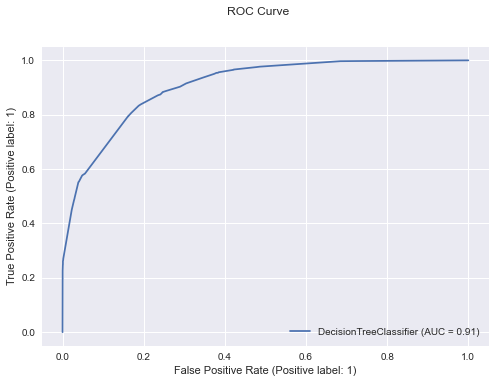

In [104]:
# AOC and ROC curve
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

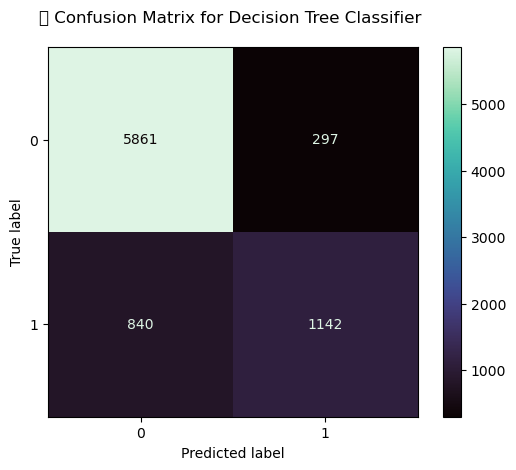

In [109]:
#Confusion Matrix 
plt.style.use('default')
class_names = census_df
metrics.plot_confusion_matrix(Final_model, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# END